In [53]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# Load the CSV
monthly_df = pd.read_csv("cpidata_whole.csv")
inflation_df = pd.read_csv("fred_inflation.csv")
# Display sample data
monthly_df.head()

,date,dairycpi,mpfecpi,fvcpi
0,1/1/1967,39.9,38.1,32.8
1,2/1/1967,39.8,38.0,32.6
2,3/1/1967,39.6,37.8,32.6
3,4/1/1967,39.6,37.5,32.1
4,5/1/1967,39.7,37.4,32.2


In [55]:
#adjust date format
monthly_df['date'] = pd.to_datetime(monthly_df['date'], format='%m/%d/%Y')
monthly_df["year"] = monthly_df["date"].dt.year
monthly_df.head()

,date,dairycpi,mpfecpi,fvcpi,year
0,1967-01-01,39.9,38.1,32.8,1967
1,1967-02-01,39.8,38.0,32.6,1967
2,1967-03-01,39.6,37.8,32.6,1967
3,1967-04-01,39.6,37.5,32.1,1967
4,1967-05-01,39.7,37.4,32.2,1967


In [56]:
#take 1/1 reading of every year
annual_df = monthly_df.iloc[0::12].reset_index(drop=True)
annual_df.head()

,date,dairycpi,mpfecpi,fvcpi,year
0,1967-01-01,39.9,38.1,32.8,1967
1,1968-01-01,40.6,37.9,35.4,1968
2,1969-01-01,42.0,40.3,36.3,1969
3,1970-01-01,44.0,45.3,37.5,1970
4,1971-01-01,45.6,43.3,36.9,1971


In [57]:
# add columns for annual inflation
annual_df["dairyi"] = ""
annual_df["mpi"] = ""
annual_df["fvi"] = ""
annual_df.head()


,date,dairycpi,mpfecpi,fvcpi,year,dairyi,mpi,fvi
0,1967-01-01,39.9,38.1,32.8,1967,,,
1,1968-01-01,40.6,37.9,35.4,1968,,,
2,1969-01-01,42.0,40.3,36.3,1969,,,
3,1970-01-01,44.0,45.3,37.5,1970,,,
4,1971-01-01,45.6,43.3,36.9,1971,,,


In [58]:
#calculate year to year percent change of cpi, this is the inflation rate
annual_df["dairyi"] = annual_df["dairycpi"].pct_change() *100
annual_df["mpi"] = annual_df["mpfecpi"].pct_change() *100
annual_df["fvi"] = annual_df["fvcpi"].pct_change() *100
annual_df.head(10)

,date,dairycpi,mpfecpi,fvcpi,year,dairyi,mpi,fvi
0,1967-01-01,39.9,38.1,32.8,1967,NaN,NaN,NaN
1,1968-01-01,40.6,37.9,35.4,1968,1.754386,-0.524934,7.926829
2,1969-01-01,42.0,40.3,36.3,1969,3.448276,6.332454,2.542373
3,1970-01-01,44.0,45.3,37.5,1970,4.761905,12.406948,3.305785
4,1971-01-01,45.6,43.3,36.9,1971,3.636364,-4.415011,-1.600000
5,1972-01-01,46.6,45.6,40.9,1972,2.192982,5.311778,10.840108
6,1973-01-01,47.6,52.2,44.2,1973,2.145923,14.473684,8.068460
7,1974-01-01,58.5,65.0,50.6,1974,22.899160,24.521073,14.479638
8,1975-01-01,62.1,62.3,55.4,1975,6.153846,-4.153846,9.486166
9,1976-01-01,67.3,70.8,58.6,1976,8.373591,13.643660,5.776173


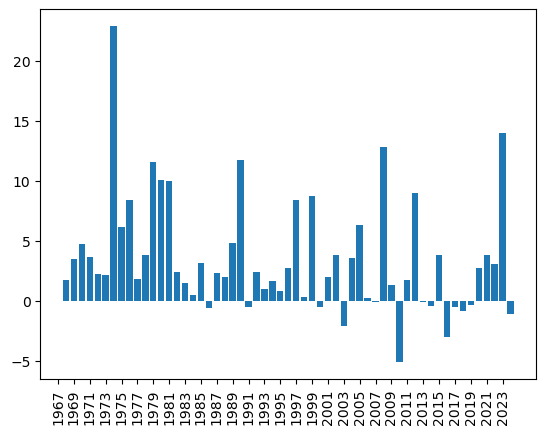

<Figure size 10000x6000 with 0 Axes>

In [59]:
#display annual dairy inflation rates in a bar graph
plt.bar(annual_df["year"],annual_df["dairyi"])
plt.xticks(np.arange(1967, 2024, 2))
plt.xticks(rotation=90)
plt.figure(figsize=(100, 60)) 
plt.show()

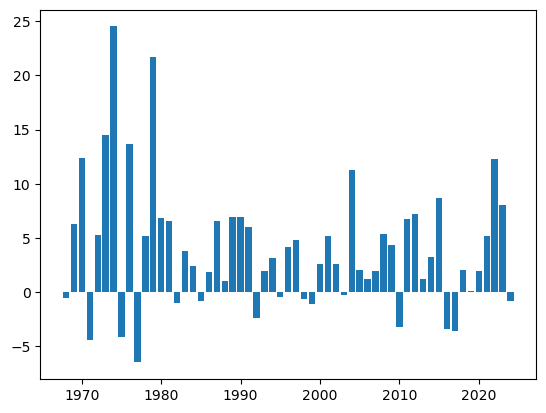

In [60]:
#display annual meat inflation rates in a bar graph
plt.bar(annual_df["year"],annual_df["mpi"])
plt.show()

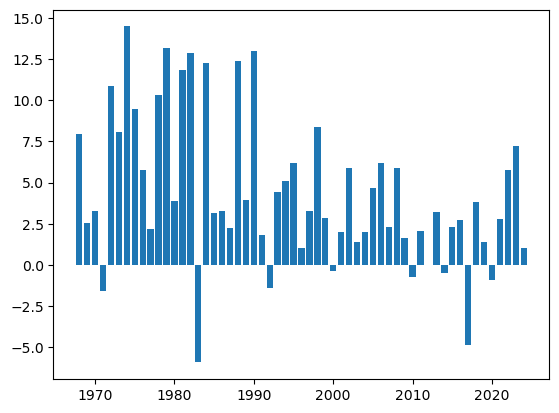

In [61]:
#display annual fruit/veg inflation rates in a bar graph
plt.bar(annual_df["year"],annual_df["fvi"])
plt.show()

In [62]:
#create copies for inflation date
inf_df = inflation_df.copy()

In [63]:
ann_df = annual_df.copy()

In [64]:
#resize to match other date set prior to merge
inf_df = inf_df.drop([0,1,2,3,4,5,6])

In [65]:
inf_df = inf_df.reset_index()


In [66]:
del inf_df["index"]

In [67]:
annual_df = annual_df.drop(57)

In [68]:
inf_df["year"] = annual_df["year"]

In [69]:
inf_df.rename(columns={"FPCPITOTLZGUSA":"inflation rate"}, inplace=True)

In [70]:
del inf_df["observation_date"]

In [71]:
main_df = pd.merge(inf_df, ann_df, on='year')

In [72]:
del main_df["date"]

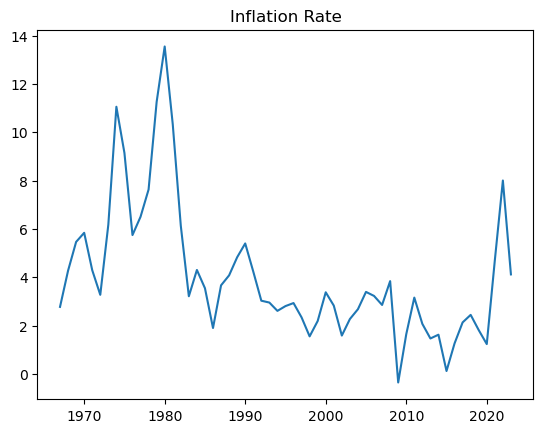

In [73]:
#view annual inflation rate
plt.plot(main_df["year"], main_df["inflation rate"])
plt.title("Inflation Rate")
#plt.plot(main_df["year"], main_df["dairyi"])
#plt.plot(main_df["year"], main_df["mpi"])
#plt.plot(main_df["year"], main_df["fvi"])
plt.show()

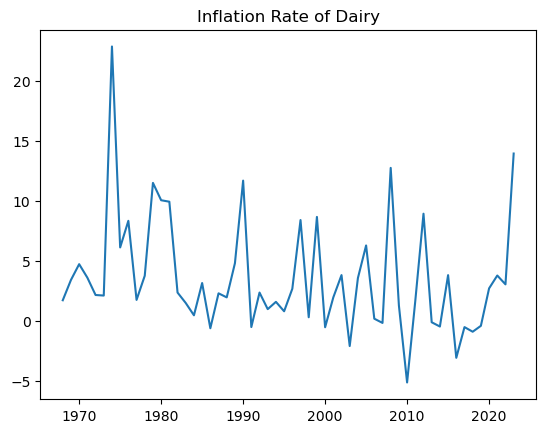

In [74]:
#view annual dairy inflation rate
plt.plot(main_df["year"], main_df["dairyi"])
plt.title("Inflation Rate of Dairy")
plt.show()

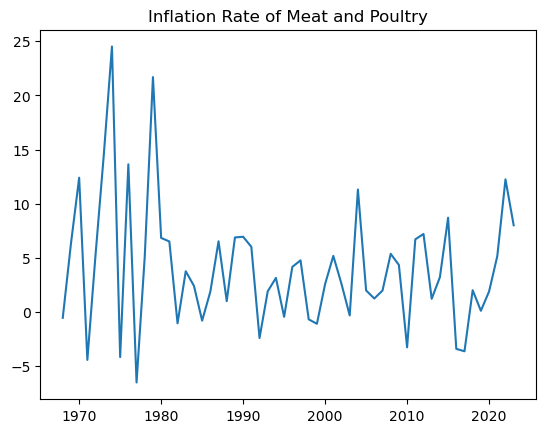

In [75]:
#view annual meat inflation rate
plt.plot(main_df["year"], main_df["mpi"])
plt.title("Inflation Rate of Meat and Poultry")
plt.show()

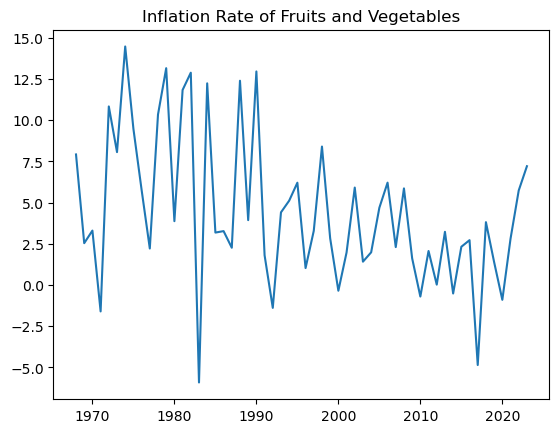

In [76]:
#view annual frut/veg inflation rate
plt.plot(main_df["year"], main_df["fvi"])
plt.title("Inflation Rate of Fruits and Vegetables")
plt.show()

In [77]:
#copy to look at monthly inflation rates
bymonth = monthly_df.copy()

In [78]:
bymonth["dairyi"] = ""
bymonth["mpi"] = ""
bymonth["fvi"] = ""

In [79]:
bymonth['date'] = pd.to_datetime(bymonth['date'], format='%m/%d/%Y')
bymonth["year"] = bymonth["date"].dt.year

In [80]:
bymonth["dairyi"] = bymonth["dairycpi"].pct_change() *100
bymonth["mpi"] = bymonth["mpfecpi"].pct_change() *100
bymonth["fvi"] = bymonth["fvcpi"].pct_change() *100
bymonth.head(10)

,date,dairycpi,mpfecpi,fvcpi,year,dairyi,mpi,fvi
0,1967-01-01,39.9,38.1,32.8,1967,NaN,NaN,NaN
1,1967-02-01,39.8,38.0,32.6,1967,-0.250627,-0.262467,-0.609756
2,1967-03-01,39.6,37.8,32.6,1967,-0.502513,-0.526316,0.000000
3,1967-04-01,39.6,37.5,32.1,1967,0.000000,-0.793651,-1.533742
4,1967-05-01,39.7,37.4,32.2,1967,0.252525,-0.266667,0.311526
5,1967-06-01,39.9,38.1,32.8,1967,0.503778,1.871658,1.863354
6,1967-07-01,39.9,38.0,33.7,1967,0.000000,-0.262467,2.743902
7,1967-08-01,40.0,38.2,34.1,1967,0.250627,0.526316,1.186944
8,1967-09-01,40.2,38.3,33.7,1967,0.500000,0.261780,-1.173021
9,1967-10-01,40.4,38.2,34.0,1967,0.497512,-0.261097,0.890208


In [81]:
#calculate STD of monthy inflation rates by year
stddairy_by_year = bymonth.groupby('year')['dairyi'].std()

In [82]:
stdmp_by_year = bymonth.groupby('year')['mpi'].std()

In [83]:
stdfv_by_year = bymonth.groupby('year')['fvi'].std()

In [84]:
#put series of inflation rates into a new data frame
std_df = pd.DataFrame({"STD Dairy":stddairy_by_year,
                       "STD Meat":stdmp_by_year,
                       "STD Fruit and Vegetables":stdfv_by_year})

In [85]:
std_df.head()

,STD Dairy,STD Meat,STD Fruit and Vegetables
year,,,
1967,0.324079,0.718504,1.286679
1968,0.332824,0.633984,1.011338
1969,0.305982,1.044653,1.523249
1970,0.225265,0.647542,1.273321
1971,0.224704,0.791243,1.796478


In [86]:
std_df = std_df.reset_index()

In [87]:
std_df.head()

,year,STD Dairy,STD Meat,STD Fruit and Vegetables
0,1967,0.324079,0.718504,1.286679
1,1968,0.332824,0.633984,1.011338
2,1969,0.305982,1.044653,1.523249
3,1970,0.225265,0.647542,1.273321
4,1971,0.224704,0.791243,1.796478


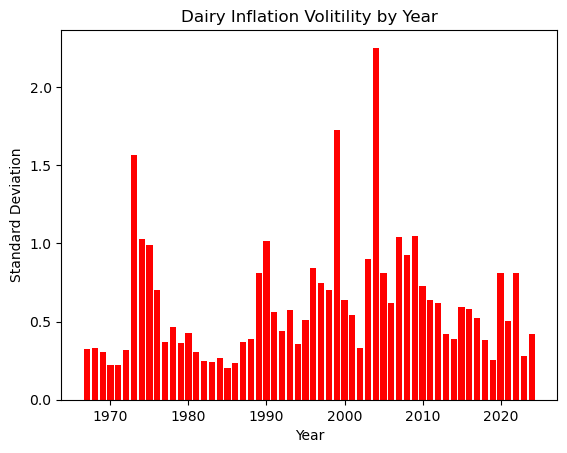

In [88]:
#view annual STD of the monthly inflation rates for dairy
plt.bar(std_df['year'], std_df['STD Dairy'], color='red')
plt.title("Dairy Inflation Volitility by Year")
plt.ylabel("Standard Deviation")
plt.xlabel("Year")
plt.savefig("DairyVol.png")
plt.show()

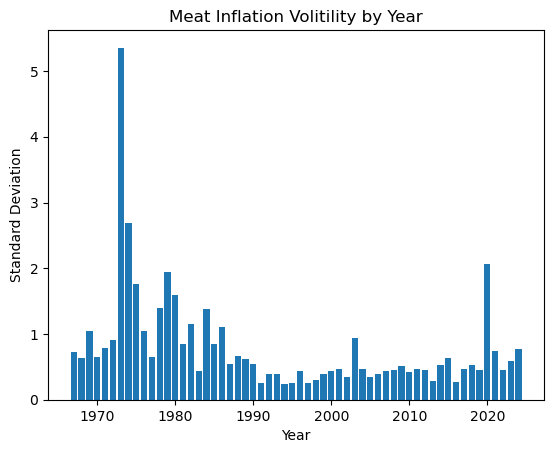

In [89]:
#view annual STD of the monthly inflation rates for meat
plt.bar(std_df['year'], std_df['STD Meat'])
plt.title("Meat Inflation Volitility by Year")
plt.ylabel("Standard Deviation")
plt.xlabel("Year")
plt.savefig("MeatVol.png")
plt.show()

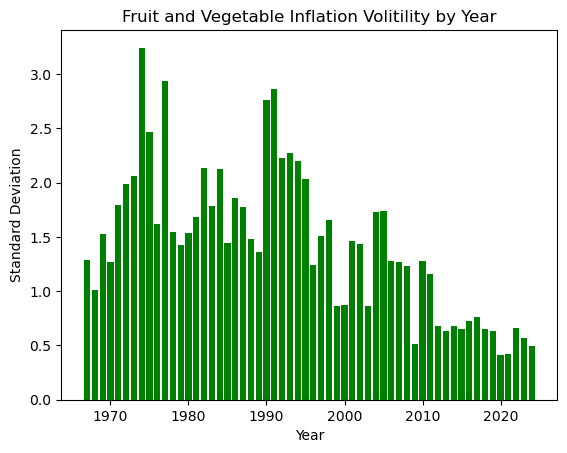

In [90]:
#view annual STD of the monthly inflation rates for fruit/veg
plt.bar(std_df['year'], std_df['STD Fruit and Vegetables'], color='green')
plt.title("Fruit and Vegetable Inflation Volitility by Year")
plt.ylabel("Standard Deviation")
plt.xlabel("Year")
plt.savefig("FVVol.png")
plt.show()